Quantum Fourier Transform: Write Your Own Function

In [1]:
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
import warnings
warnings.filterwarnings("ignore")

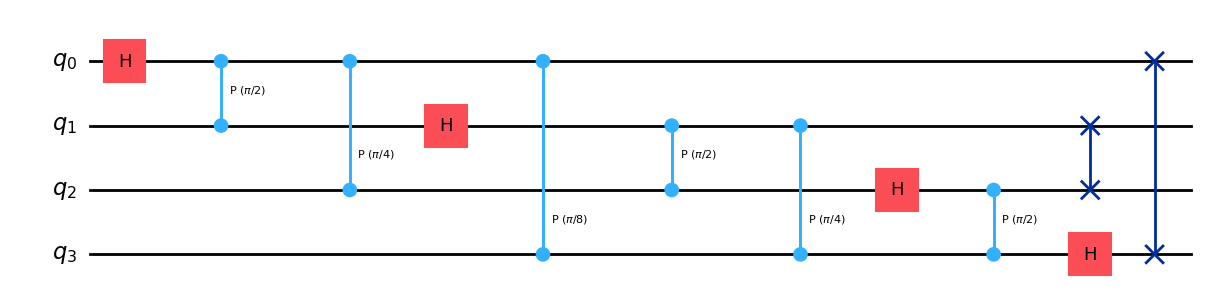

In [2]:
import numpy as np
pi = np.pi

def myQFT(nqubits):

    myQFT_circuit = QuantumCircuit(nqubits)

    for qubit in range(nqubits):
        myQFT_circuit.h(qubit)
        for otherqubit in range(qubit+1, nqubits):
            myQFT_circuit.cp( pi / (2**(otherqubit-qubit)), otherqubit, qubit )

    for qubit in range(nqubits // 2):
        myQFT_circuit.swap(qubit,nqubits-1-qubit)

    return myQFT_circuit

display(myQFT(4).draw("mpl"))

Computational basis |000>


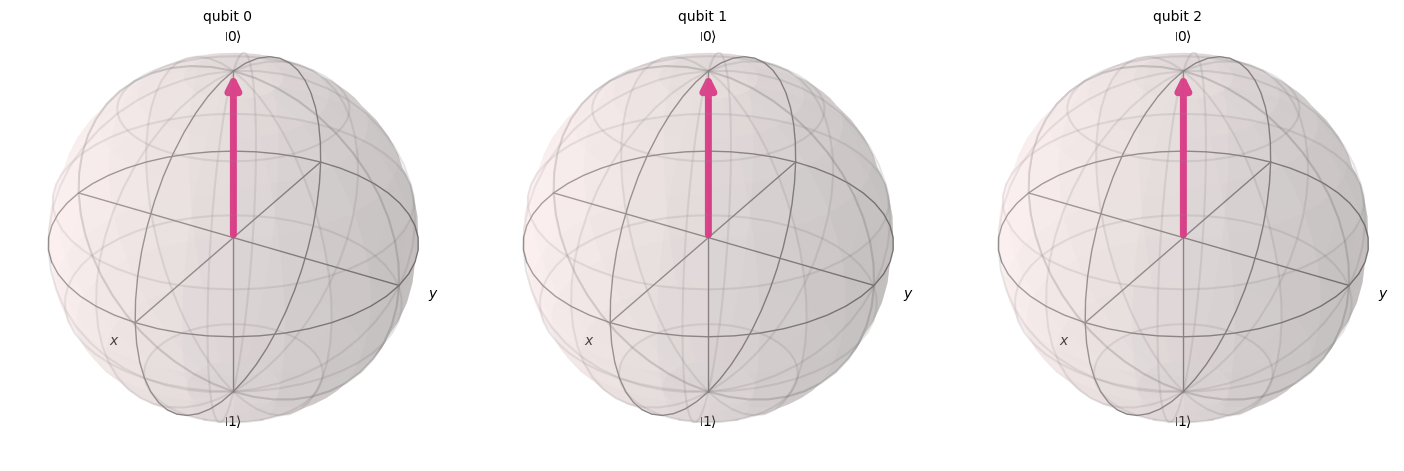

Fourier basis |000>


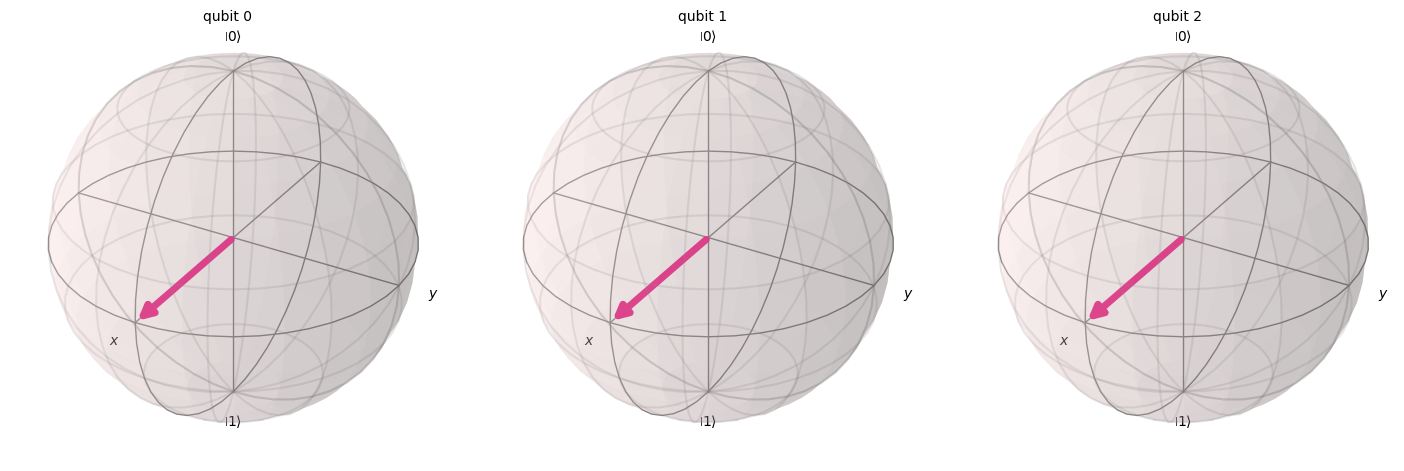

In [3]:
state = "000"

mycircuit = QuantumCircuit(len(state))
mycircuit.initialize(Statevector.from_label(state).data, mycircuit.qubits[::-1])
print(f"Computational basis |{state}>")
display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data))
print(f"Fourier basis |{state}>")
mycircuit.append(myQFT(len(state)), mycircuit.qubits)
display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data))

Computational basis |001>


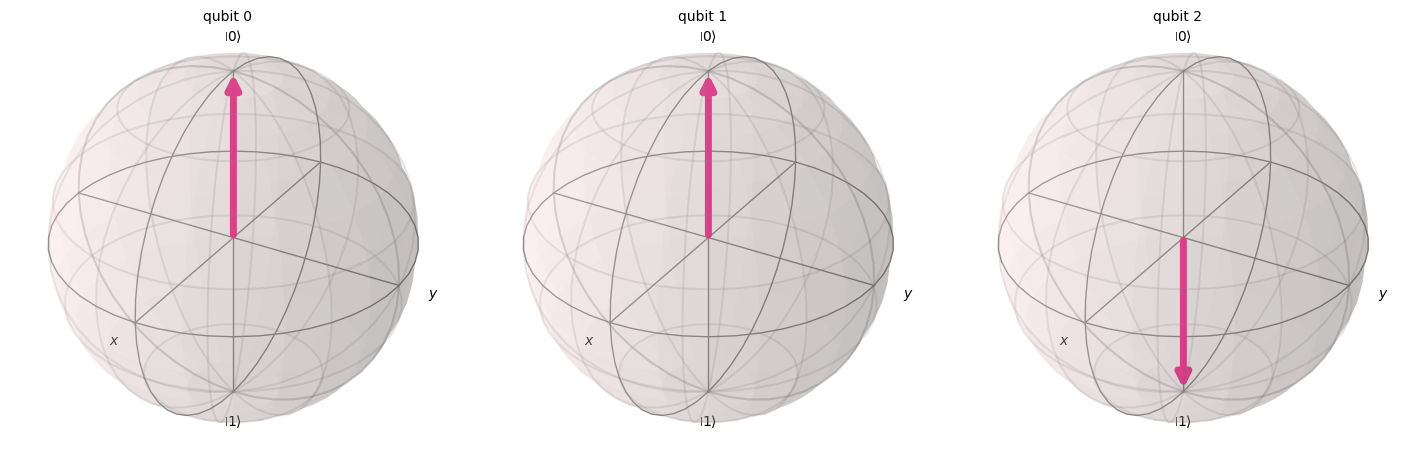

Fourier basis |001>


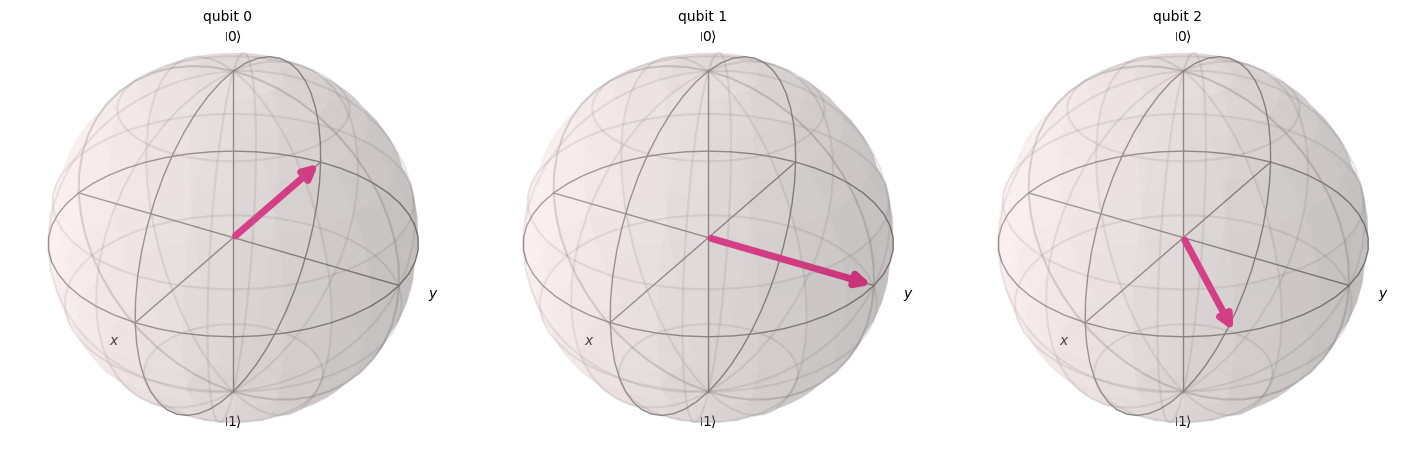

In [4]:
state = "001"

mycircuit = QuantumCircuit(len(state))
mycircuit.initialize(Statevector.from_label(state).data, mycircuit.qubits[::-1])
print(f"Computational basis |{state}>")
display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data))
print(f"Fourier basis |{state}>")
mycircuit.append(myQFT(len(state)), mycircuit.qubits)
display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data))